<a href="https://colab.research.google.com/github/Celinekimm/regression/blob/main/Boston_Estate_Analysis(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

In [54]:
from sklearn.datasets import load_boston

In [55]:
data = load_boston()

In [56]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [57]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [58]:
df['MEDV'] = data['target']

In [59]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

In [62]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [63]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
179,0.05780,0.0,2.46,0.0,0.488,6.980,58.4,2.8290,3.0,193.0,17.8,396.90,5.04
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99


In [64]:
y_train.head()

172    23.1
3      33.4
179    37.2
414     7.0
348    24.5
Name: MEDV, dtype: float64

In [65]:
# Mean Squared Error
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

In [66]:
def my_mse(pred, actual):
  return((pred-actual)**2).mean()

In [67]:
my_mse(pred, actual)

4.0

In [68]:
# Mean Absolute Error
def my_mae(pred, actual):
  return np.abs(pred - actual).mean()

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

In [69]:
my_mae(pred, actual)

2.0

In [70]:
# Root Mean Squared Error
def my_rmse(pred, actual):
  return np.sqrt(my_mse(pred, actual))

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


In [71]:
my_rmse(pred, actual)

2.0

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [74]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
# Regularization

from sklearn.linear_model import Ridge

In [79]:
# 값이 커질 수록 큰 규제
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

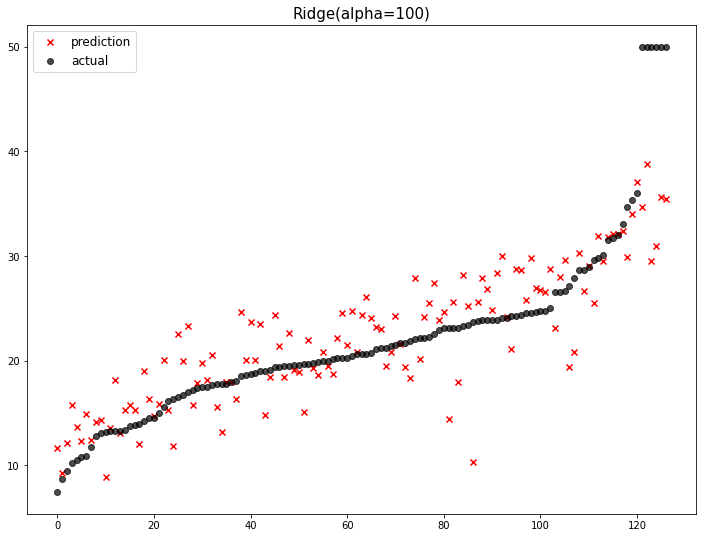

              model        mse
0  Ridge(alpha=100)  23.535103


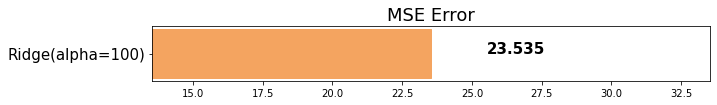

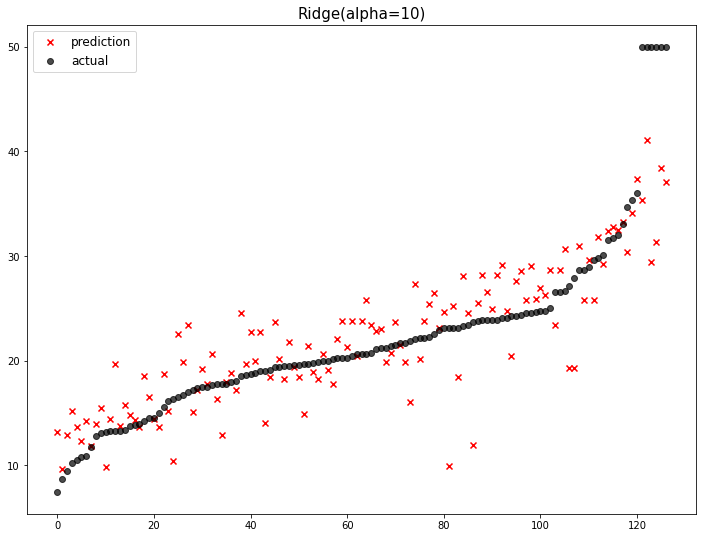

              model        mse
0  Ridge(alpha=100)  23.535103
1   Ridge(alpha=10)  22.160336


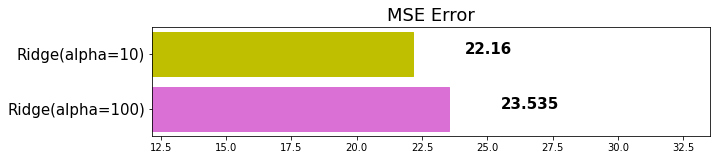

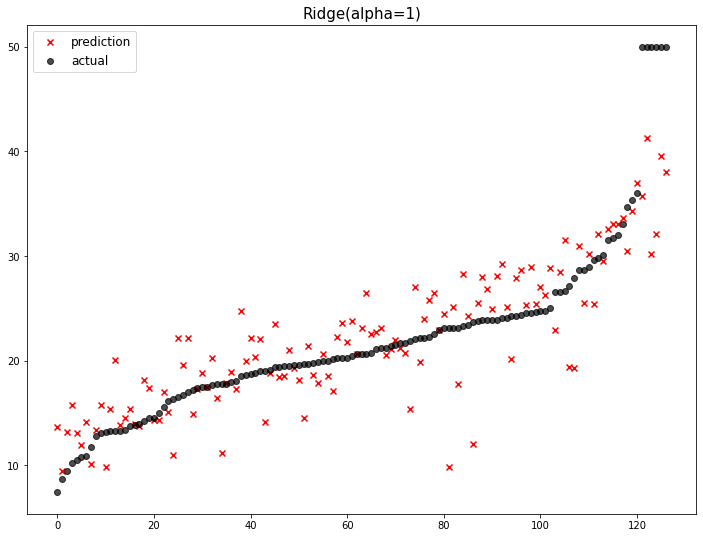

              model        mse
0  Ridge(alpha=100)  23.535103
1   Ridge(alpha=10)  22.160336
2    Ridge(alpha=1)  21.409736


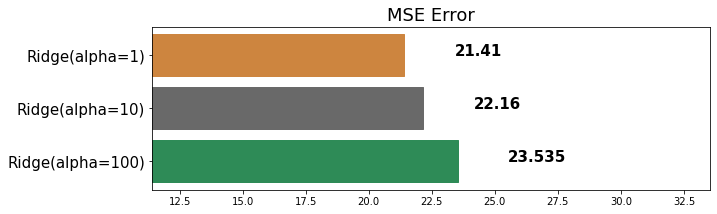

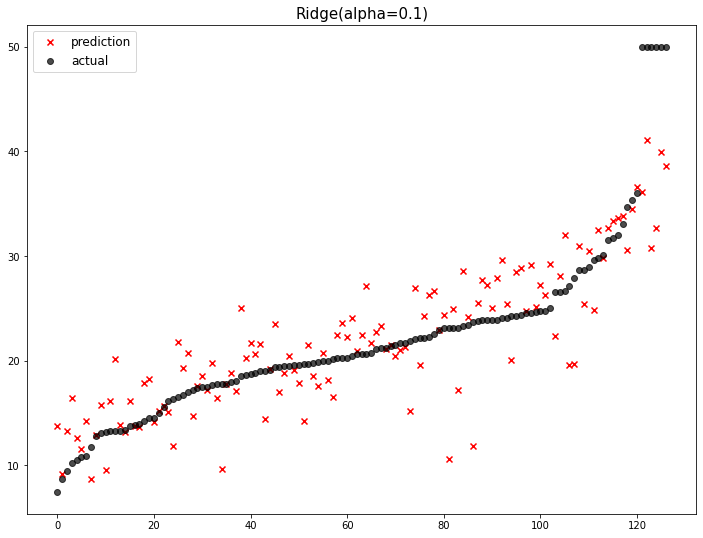

              model        mse
0  Ridge(alpha=100)  23.535103
1   Ridge(alpha=10)  22.160336
2    Ridge(alpha=1)  21.409736
3  Ridge(alpha=0.1)  21.362183


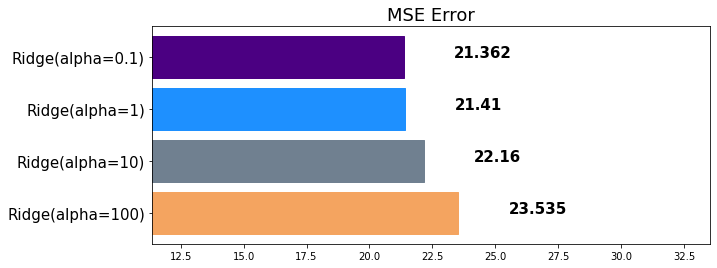

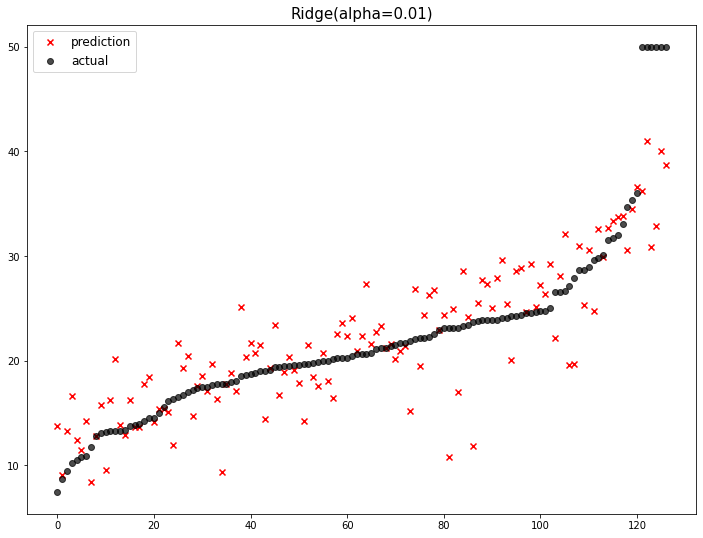

               model        mse
0   Ridge(alpha=100)  23.535103
1    Ridge(alpha=10)  22.160336
2  Ridge(alpha=0.01)  21.412031
3     Ridge(alpha=1)  21.409736
4   Ridge(alpha=0.1)  21.362183


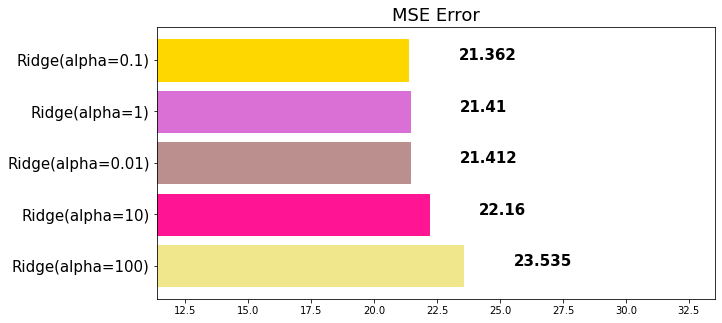

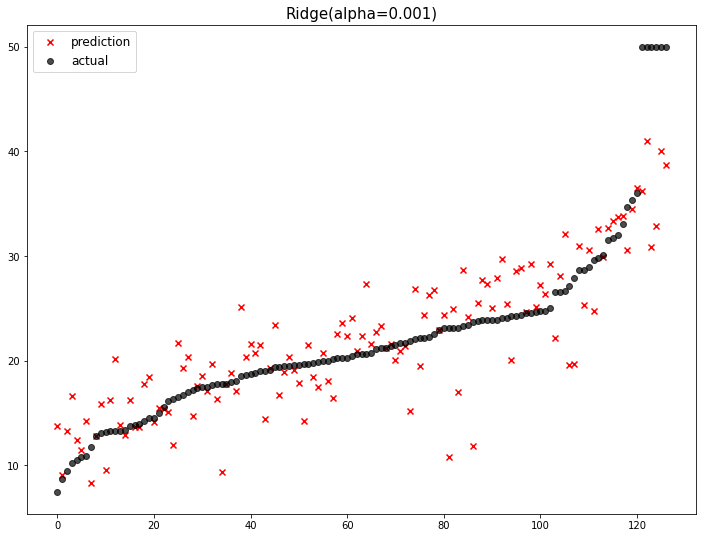

                model        mse
0    Ridge(alpha=100)  23.535103
1     Ridge(alpha=10)  22.160336
2  Ridge(alpha=0.001)  21.418607
3   Ridge(alpha=0.01)  21.412031
4      Ridge(alpha=1)  21.409736
5    Ridge(alpha=0.1)  21.362183


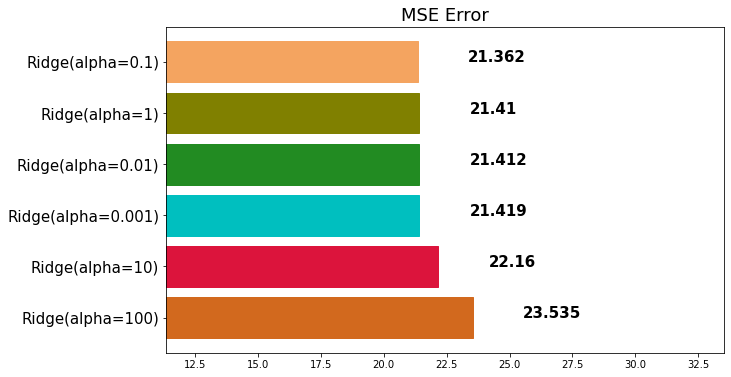

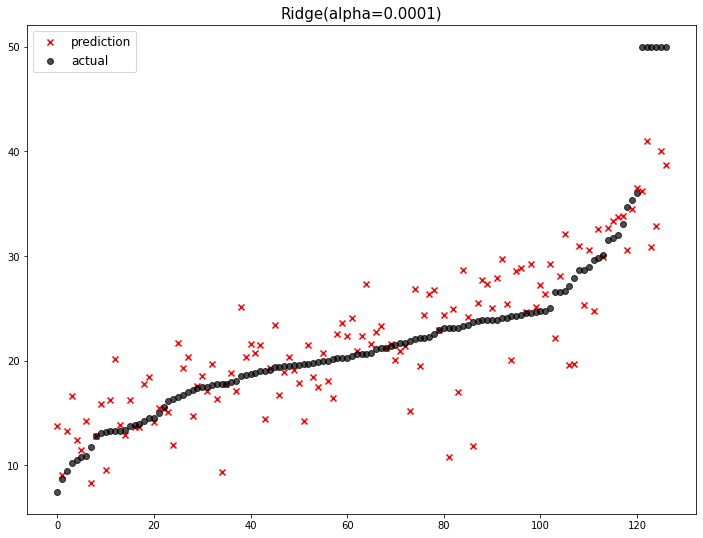

                 model        mse
0     Ridge(alpha=100)  23.535103
1      Ridge(alpha=10)  22.160336
2  Ridge(alpha=0.0001)  21.419283
3   Ridge(alpha=0.001)  21.418607
4    Ridge(alpha=0.01)  21.412031
5       Ridge(alpha=1)  21.409736
6     Ridge(alpha=0.1)  21.362183


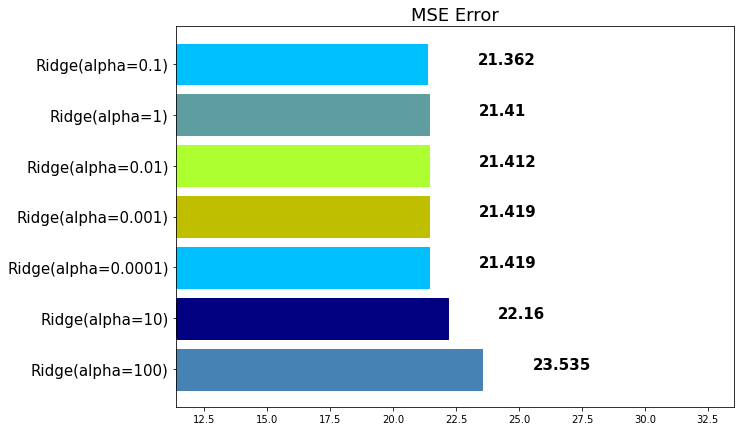

In [80]:
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train, y_train)
  pred = ridge.predict(x_test)
  mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [81]:
ridge.coef_

array([ -0.10673755,   0.0527979 ,   0.00204393,   1.39357261,
       -19.66277079,   3.84333145,   0.00020382,  -1.5720387 ,
         0.31823633,  -0.01383163,  -0.91508751,   0.00818155,
        -0.4982952 ])

In [82]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

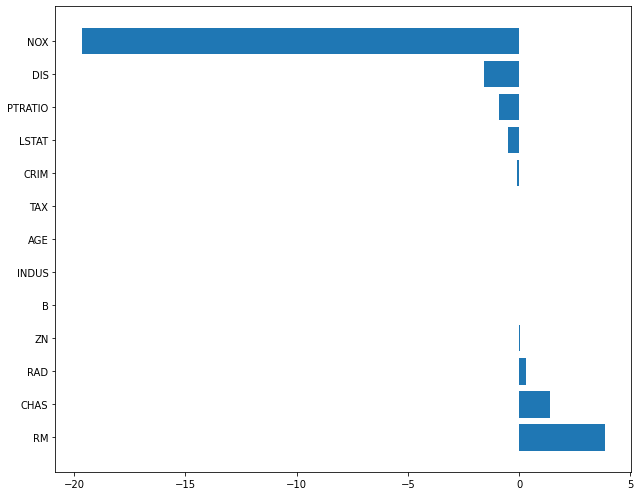

In [84]:
plot_coef(x_train.columns, ridge.coef_)

In [86]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

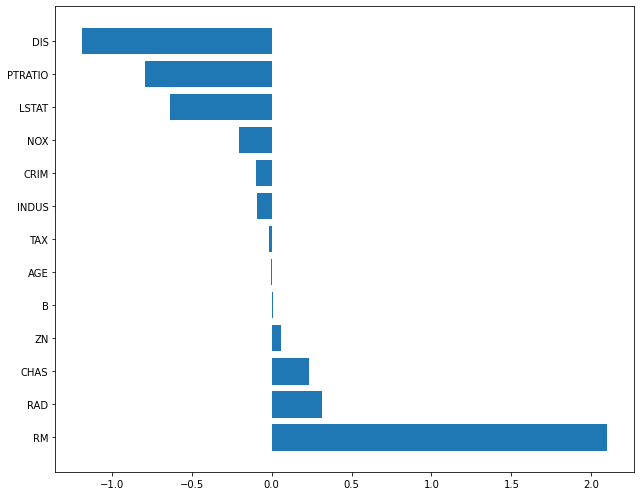

In [87]:
plot_coef(x_train.columns, ridge_100.coef_)

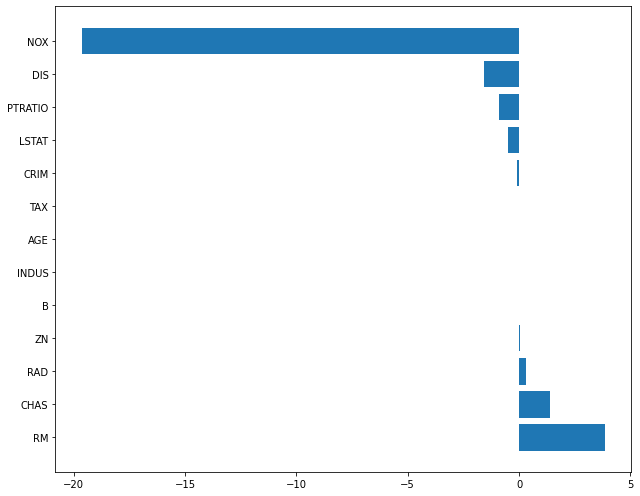

In [88]:
plot_coef(x_train.columns, ridge_001.coef_)

In [89]:
from sklearn.linear_model import Lasso

In [90]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

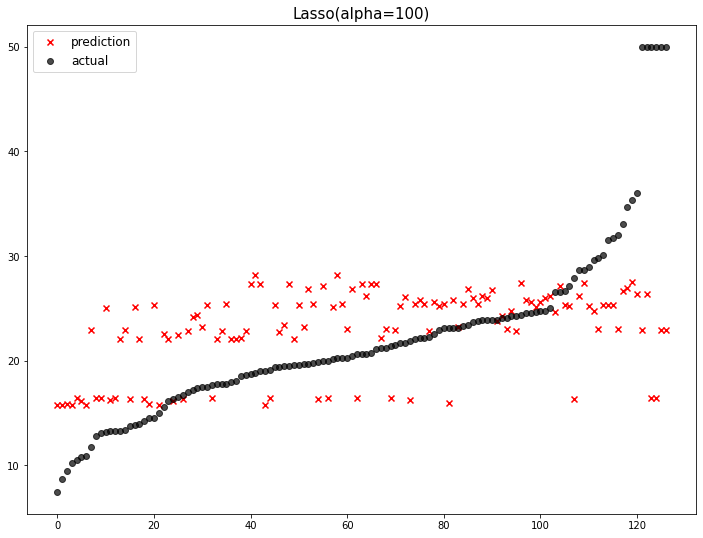

                 model        mse
0     Lasso(alpha=100)  66.698713
1     Ridge(alpha=100)  23.535103
2      Ridge(alpha=10)  22.160336
3  Ridge(alpha=0.0001)  21.419283
4   Ridge(alpha=0.001)  21.418607
5    Ridge(alpha=0.01)  21.412031
6       Ridge(alpha=1)  21.409736
7     Ridge(alpha=0.1)  21.362183


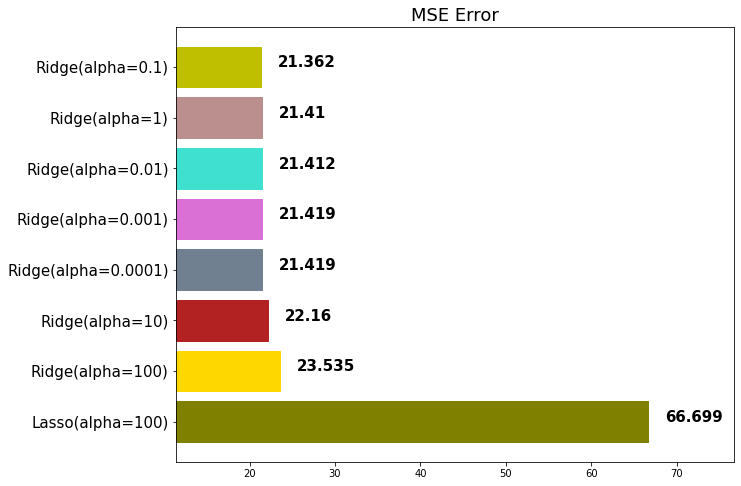

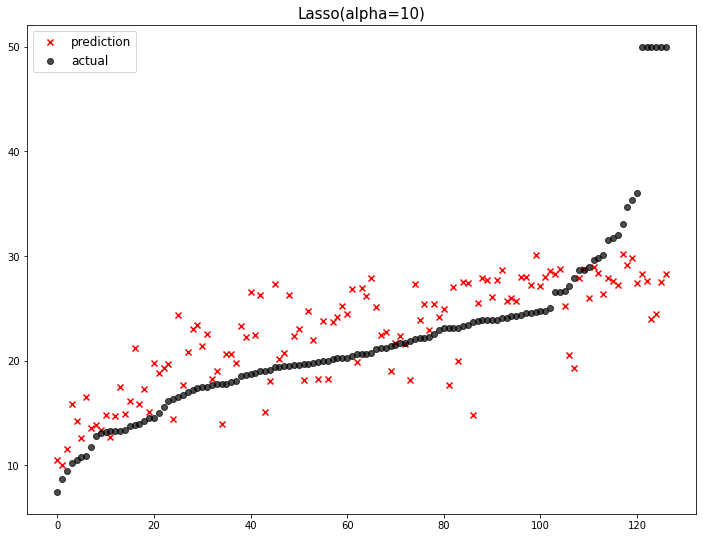

                 model        mse
0     Lasso(alpha=100)  66.698713
1      Lasso(alpha=10)  40.572950
2     Ridge(alpha=100)  23.535103
3      Ridge(alpha=10)  22.160336
4  Ridge(alpha=0.0001)  21.419283
5   Ridge(alpha=0.001)  21.418607
6    Ridge(alpha=0.01)  21.412031
7       Ridge(alpha=1)  21.409736
8     Ridge(alpha=0.1)  21.362183


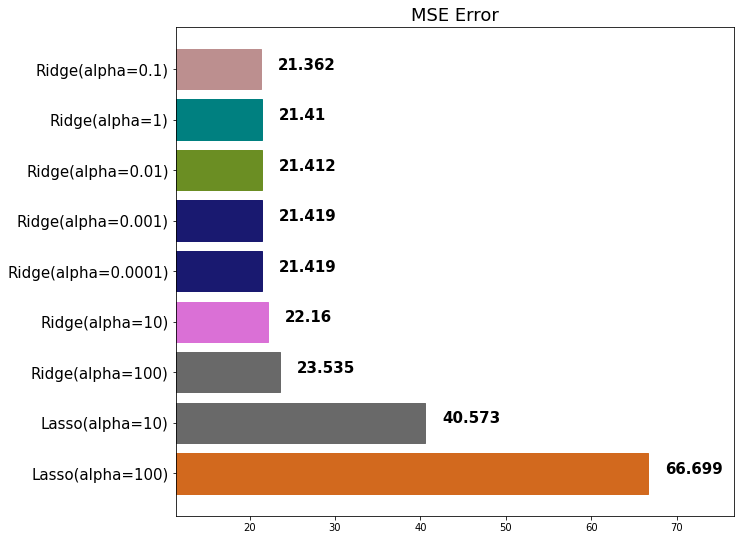

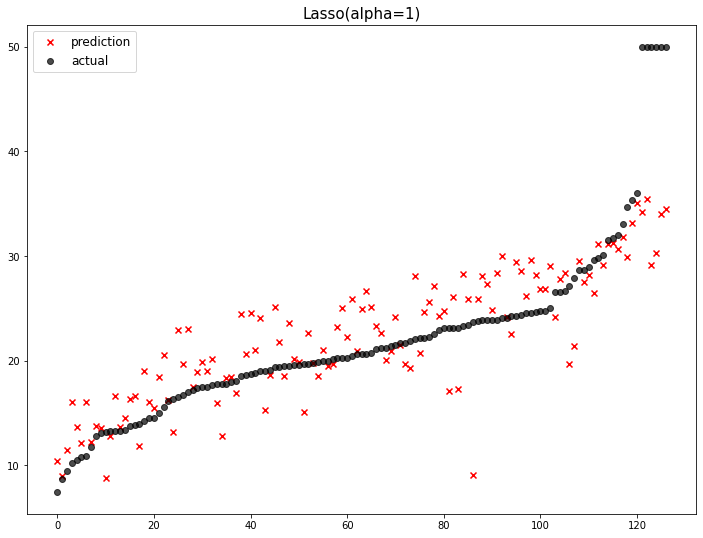

                 model        mse
0     Lasso(alpha=100)  66.698713
1      Lasso(alpha=10)  40.572950
2       Lasso(alpha=1)  25.634577
3     Ridge(alpha=100)  23.535103
4      Ridge(alpha=10)  22.160336
5  Ridge(alpha=0.0001)  21.419283
6   Ridge(alpha=0.001)  21.418607
7    Ridge(alpha=0.01)  21.412031
8       Ridge(alpha=1)  21.409736
9     Ridge(alpha=0.1)  21.362183


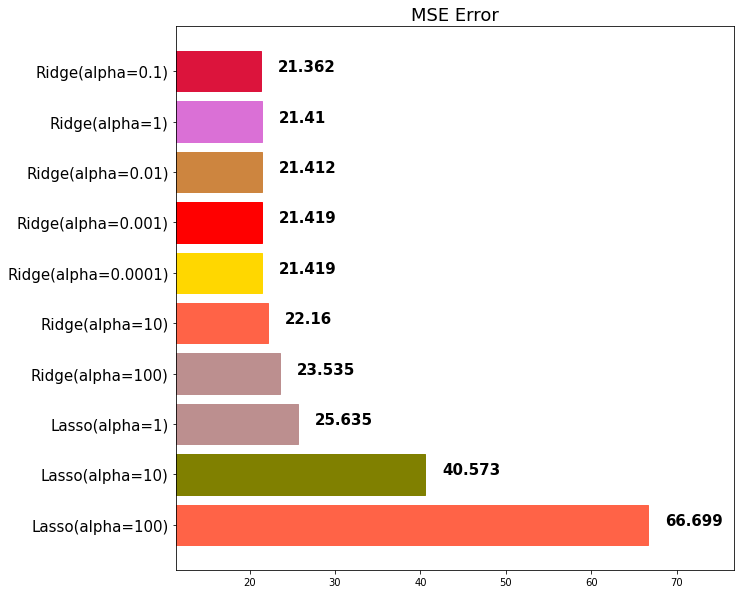

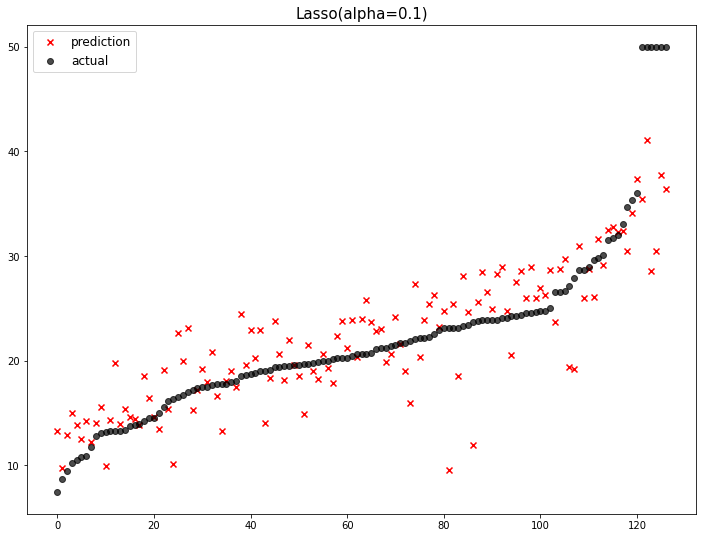

                  model        mse
0      Lasso(alpha=100)  66.698713
1       Lasso(alpha=10)  40.572950
2        Lasso(alpha=1)  25.634577
3      Ridge(alpha=100)  23.535103
4      Lasso(alpha=0.1)  23.045074
5       Ridge(alpha=10)  22.160336
6   Ridge(alpha=0.0001)  21.419283
7    Ridge(alpha=0.001)  21.418607
8     Ridge(alpha=0.01)  21.412031
9        Ridge(alpha=1)  21.409736
10     Ridge(alpha=0.1)  21.362183


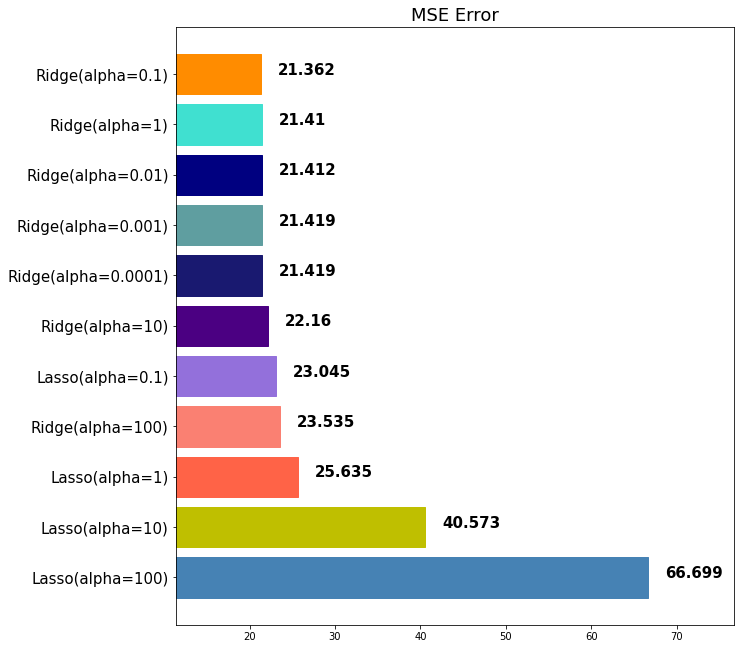

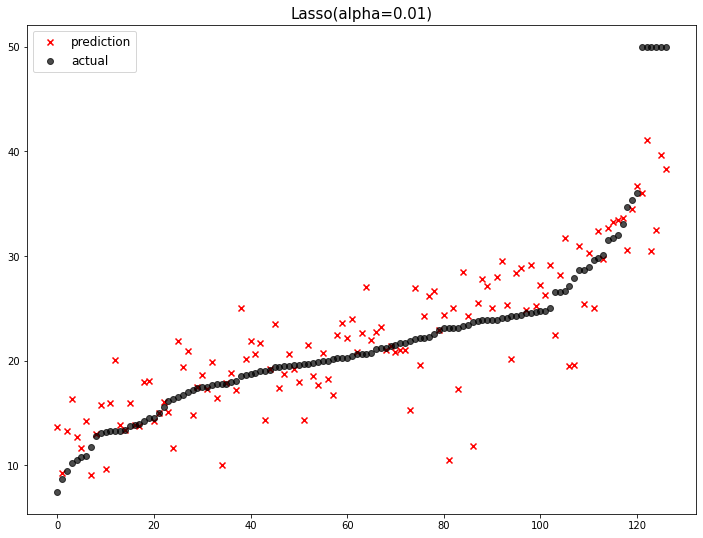

                  model        mse
0      Lasso(alpha=100)  66.698713
1       Lasso(alpha=10)  40.572950
2        Lasso(alpha=1)  25.634577
3      Ridge(alpha=100)  23.535103
4      Lasso(alpha=0.1)  23.045074
5       Ridge(alpha=10)  22.160336
6     Lasso(alpha=0.01)  21.427858
7   Ridge(alpha=0.0001)  21.419283
8    Ridge(alpha=0.001)  21.418607
9     Ridge(alpha=0.01)  21.412031
10       Ridge(alpha=1)  21.409736
11     Ridge(alpha=0.1)  21.362183


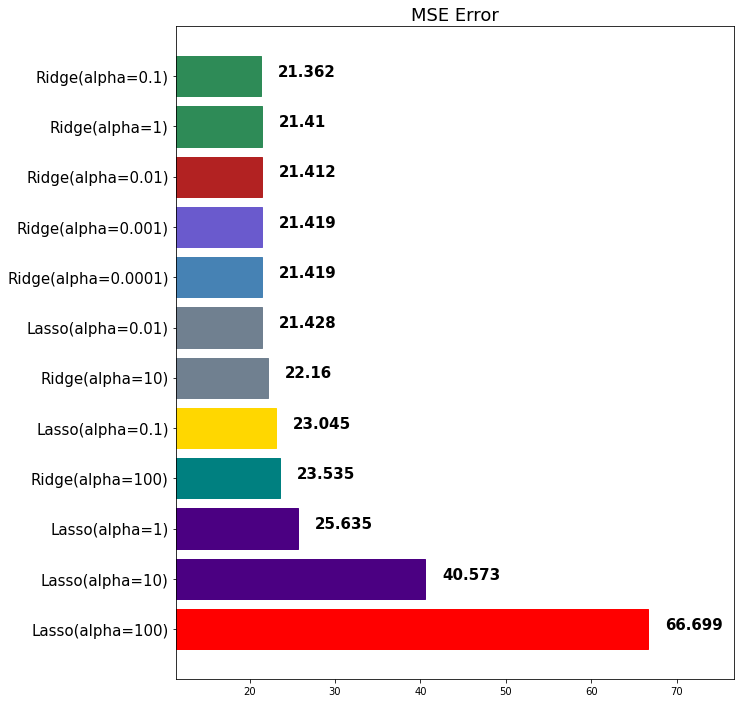

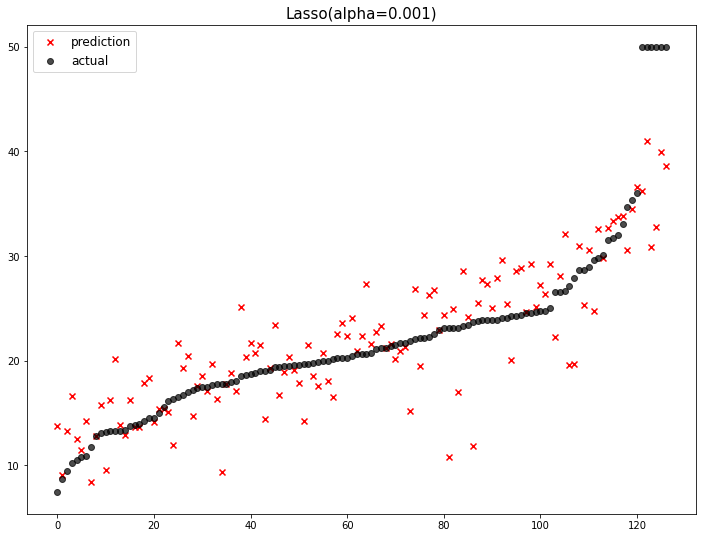

                  model        mse
0      Lasso(alpha=100)  66.698713
1       Lasso(alpha=10)  40.572950
2        Lasso(alpha=1)  25.634577
3      Ridge(alpha=100)  23.535103
4      Lasso(alpha=0.1)  23.045074
5       Ridge(alpha=10)  22.160336
6     Lasso(alpha=0.01)  21.427858
7   Ridge(alpha=0.0001)  21.419283
8    Ridge(alpha=0.001)  21.418607
9    Lasso(alpha=0.001)  21.415542
10    Ridge(alpha=0.01)  21.412031
11       Ridge(alpha=1)  21.409736
12     Ridge(alpha=0.1)  21.362183


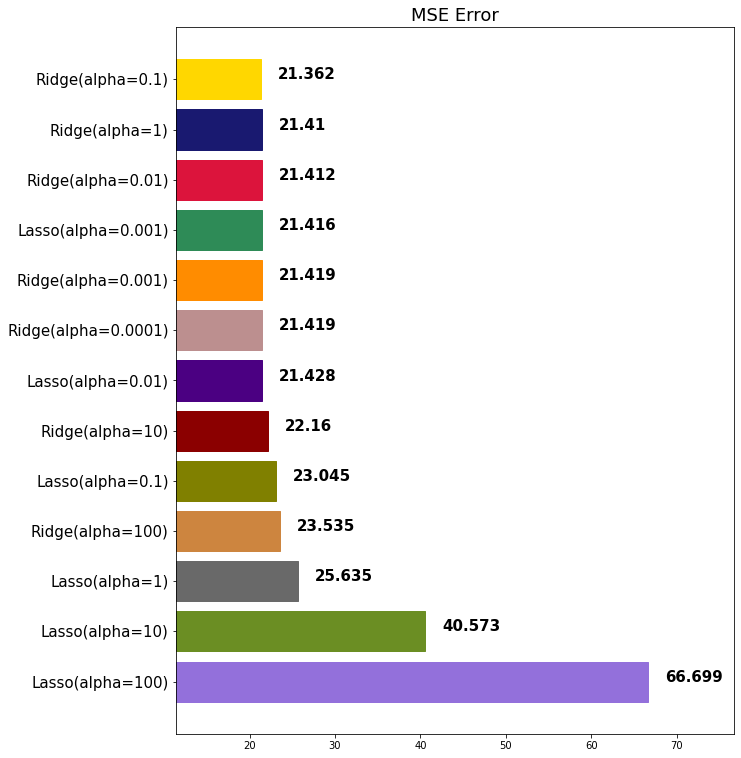

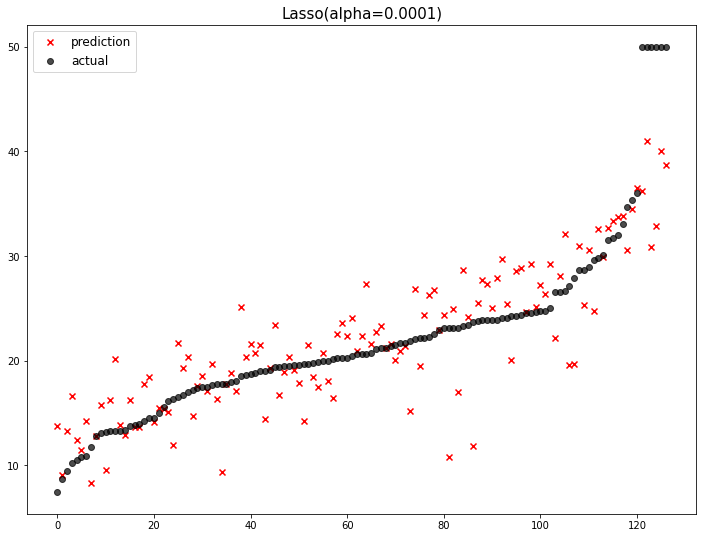

                  model        mse
0      Lasso(alpha=100)  66.698713
1       Lasso(alpha=10)  40.572950
2        Lasso(alpha=1)  25.634577
3      Ridge(alpha=100)  23.535103
4      Lasso(alpha=0.1)  23.045074
5       Ridge(alpha=10)  22.160336
6     Lasso(alpha=0.01)  21.427858
7   Ridge(alpha=0.0001)  21.419283
8   Lasso(alpha=0.0001)  21.418929
9    Ridge(alpha=0.001)  21.418607
10   Lasso(alpha=0.001)  21.415542
11    Ridge(alpha=0.01)  21.412031
12       Ridge(alpha=1)  21.409736
13     Ridge(alpha=0.1)  21.362183


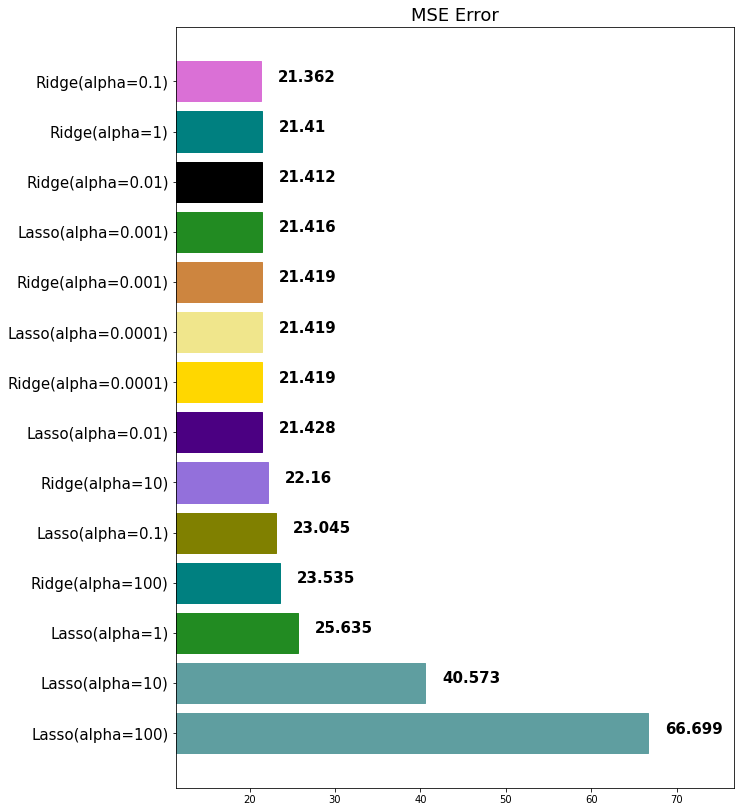

In [92]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [93]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

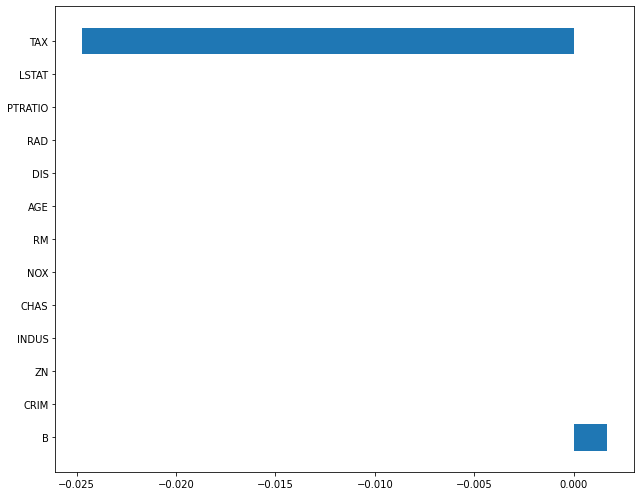

In [94]:
plot_coef(x_train.columns, lasso_100.coef_)

In [95]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.0247419 ,
       -0.        ,  0.00169543, -0.        ])

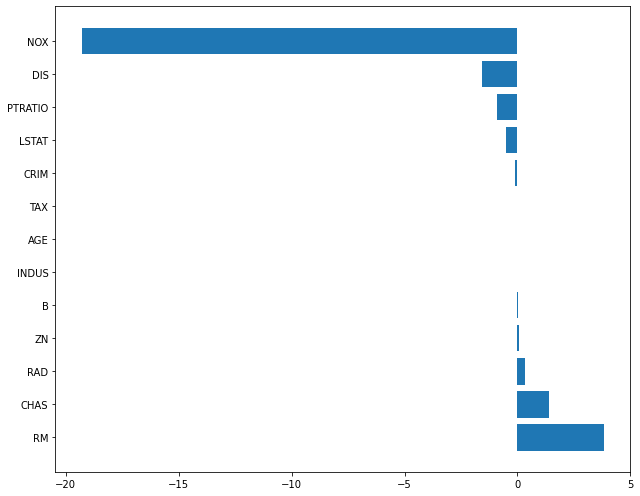

In [96]:
plot_coef(x_train.columns, lasso_001.coef_)

In [97]:
lasso_001.coef_

array([ -0.10665351,   0.05280007,   0.0005728 ,   1.37340248,
       -19.30027693,   3.84476556,  -0.0001371 ,  -1.56632868,
         0.31725237,  -0.0138619 ,  -0.91178277,   0.00820966,
        -0.4983059 ])

In [98]:
# ElasticNet
from sklearn.linear_model import ElasticNet

In [99]:
ratios = [0.2, 0.5, 0.8]

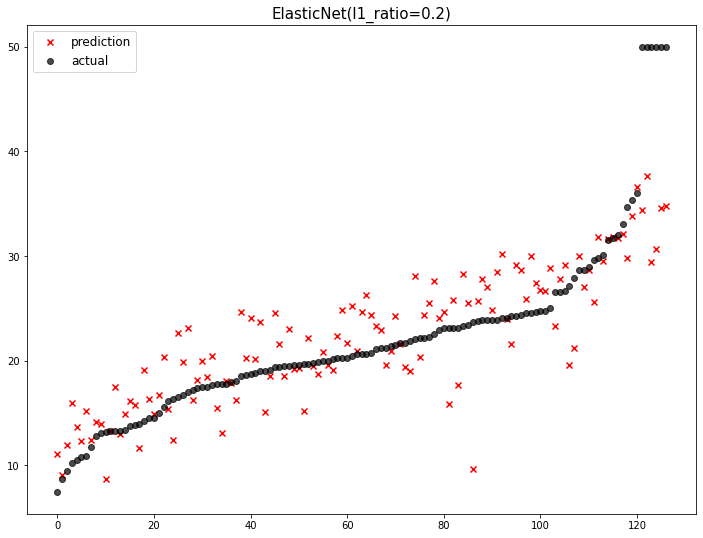

                       model        mse
0           Lasso(alpha=100)  66.698713
1            Lasso(alpha=10)  40.572950
2             Lasso(alpha=1)  25.634577
3   ElasticNet(l1_ratio=0.2)  24.411923
4           Ridge(alpha=100)  23.535103
5           Lasso(alpha=0.1)  23.045074
6            Ridge(alpha=10)  22.160336
7          Lasso(alpha=0.01)  21.427858
8        Ridge(alpha=0.0001)  21.419283
9        Lasso(alpha=0.0001)  21.418929
10        Ridge(alpha=0.001)  21.418607
11        Lasso(alpha=0.001)  21.415542
12         Ridge(alpha=0.01)  21.412031
13            Ridge(alpha=1)  21.409736
14          Ridge(alpha=0.1)  21.362183


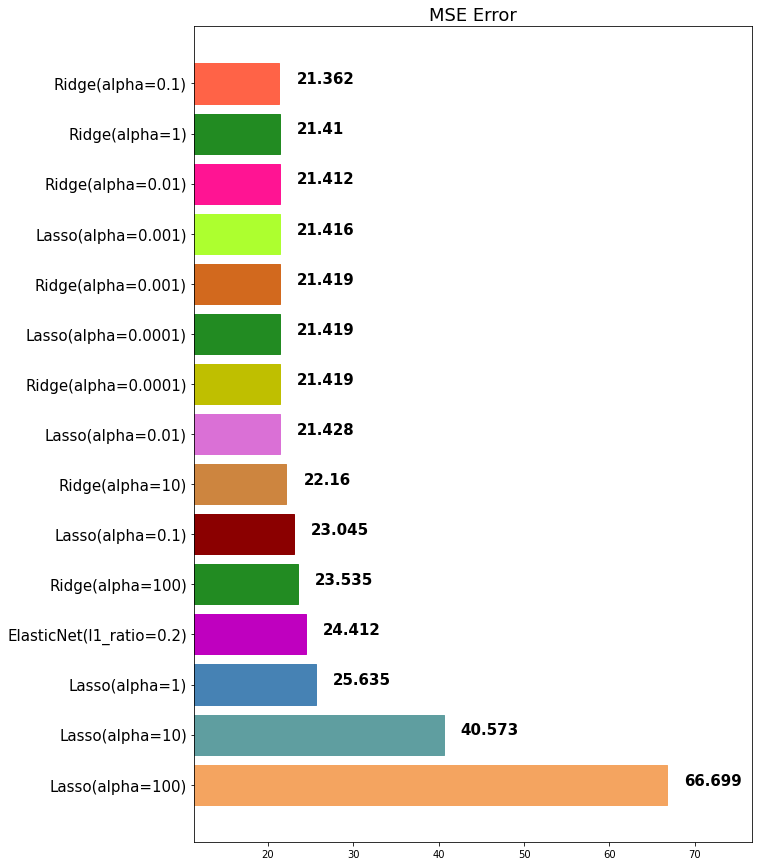

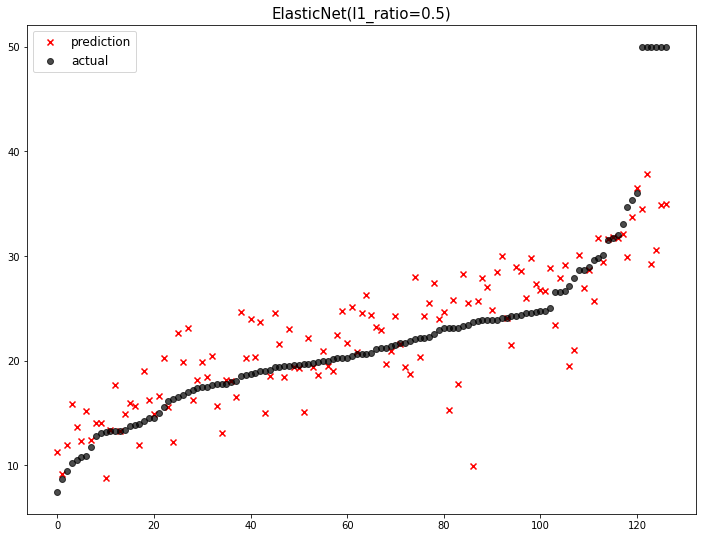

                       model        mse
0           Lasso(alpha=100)  66.698713
1            Lasso(alpha=10)  40.572950
2             Lasso(alpha=1)  25.634577
3   ElasticNet(l1_ratio=0.2)  24.411923
4   ElasticNet(l1_ratio=0.5)  24.215986
5           Ridge(alpha=100)  23.535103
6           Lasso(alpha=0.1)  23.045074
7            Ridge(alpha=10)  22.160336
8          Lasso(alpha=0.01)  21.427858
9        Ridge(alpha=0.0001)  21.419283
10       Lasso(alpha=0.0001)  21.418929
11        Ridge(alpha=0.001)  21.418607
12        Lasso(alpha=0.001)  21.415542
13         Ridge(alpha=0.01)  21.412031
14            Ridge(alpha=1)  21.409736
15          Ridge(alpha=0.1)  21.362183


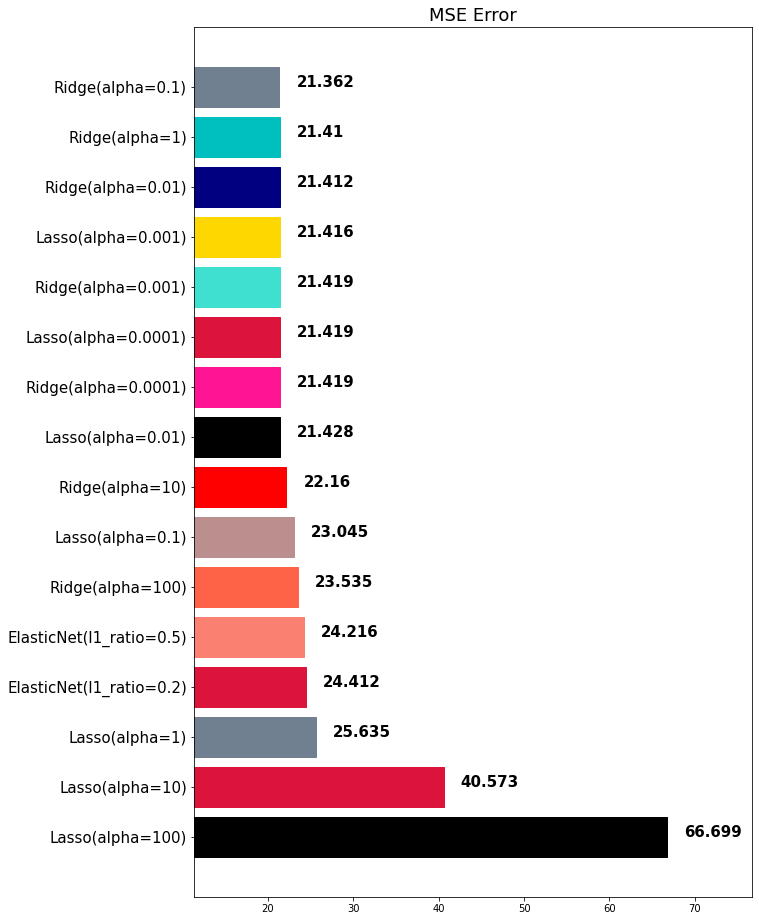

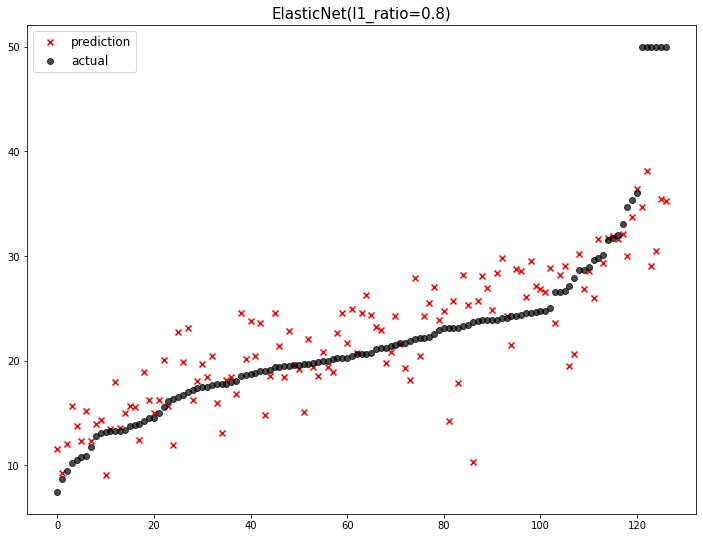

                       model        mse
0           Lasso(alpha=100)  66.698713
1            Lasso(alpha=10)  40.572950
2             Lasso(alpha=1)  25.634577
3   ElasticNet(l1_ratio=0.2)  24.411923
4   ElasticNet(l1_ratio=0.5)  24.215986
5   ElasticNet(l1_ratio=0.8)  23.910466
6           Ridge(alpha=100)  23.535103
7           Lasso(alpha=0.1)  23.045074
8            Ridge(alpha=10)  22.160336
9          Lasso(alpha=0.01)  21.427858
10       Ridge(alpha=0.0001)  21.419283
11       Lasso(alpha=0.0001)  21.418929
12        Ridge(alpha=0.001)  21.418607
13        Lasso(alpha=0.001)  21.415542
14         Ridge(alpha=0.01)  21.412031
15            Ridge(alpha=1)  21.409736
16          Ridge(alpha=0.1)  21.362183


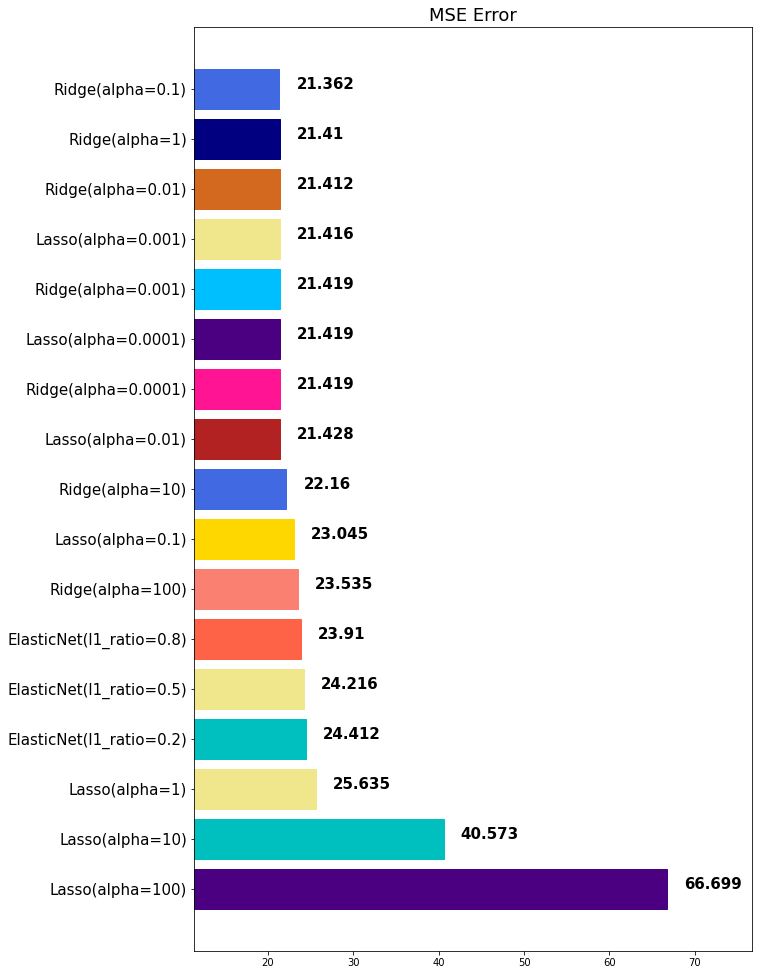

In [100]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [101]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

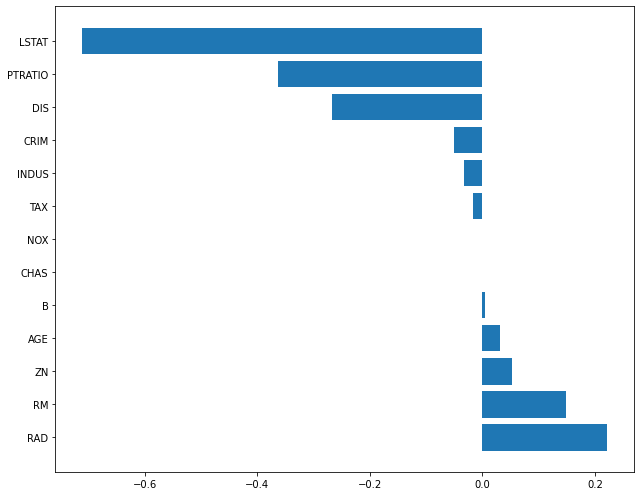

In [102]:
plot_coef(x_train.columns, elsticnet_20.coef_)

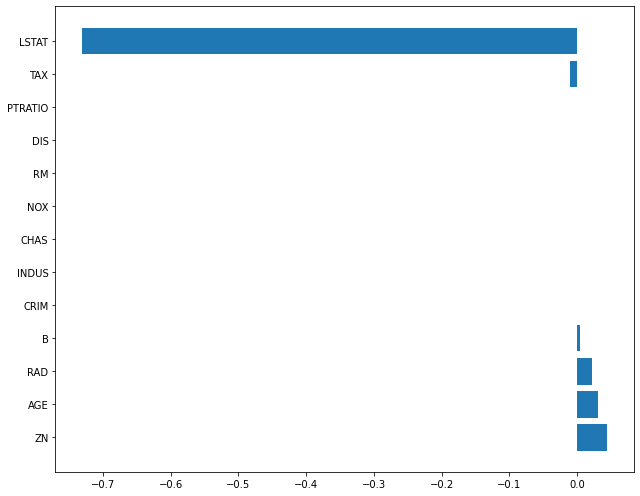

In [103]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [105]:
elsticnet_80.coef_

array([-0.        ,  0.04435091, -0.        ,  0.        ,  0.        ,
        0.        ,  0.03050169, -0.        ,  0.02240105, -0.01098402,
       -0.        ,  0.00344458, -0.73107552])

In [106]:
# Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [107]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.00000
mean,3.734294,12.788918,10.909472,0.065963,0.551641,6.309456,68.068865,3.853727,9.754617,410.527704,18.446174,358.921372,12.63905
std,9.008535,25.209158,6.942628,0.248546,0.116324,0.729894,28.492696,2.163386,8.832087,172.376008,2.175891,88.858323,7.34767
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.200000,1.129600,1.000000,187.000000,12.600000,0.320000,1.98000
25%,0.081930,0.000000,4.930000,0.000000,0.448000,5.888000,43.100000,2.122300,4.000000,277.000000,17.400000,376.355000,6.79500
50%,0.229270,0.000000,8.560000,0.000000,0.532000,6.223000,77.700000,3.199200,5.000000,330.000000,19.100000,391.340000,11.12000
75%,4.067905,20.000000,18.100000,0.000000,0.631000,6.652000,93.550000,5.287300,24.000000,666.000000,20.200000,396.290000,17.10500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000


In [108]:
# StandardScaler
# Mean = 0, Std=1
std_scaler = StandardScaler()

In [109]:
std_scaled = std_scaler.fit_transform(x_train)

In [111]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.41,-0.51,-1.51,-0.27,-1.43,-3.77,-2.17,-1.26,-0.99,-1.30,-2.69,-4.04,-1.45
25%,-0.41,-0.51,-0.86,-0.27,-0.89,-0.58,-0.88,-0.80,-0.65,-0.78,-0.48,0.20,-0.80
50%,-0.39,-0.51,-0.34,-0.27,-0.17,-0.12,0.34,-0.30,-0.54,-0.47,0.30,0.37,-0.21
75%,0.04,0.29,1.04,-0.27,0.68,0.47,0.90,0.66,1.62,1.48,0.81,0.42,0.61
max,9.47,3.46,2.43,3.76,2.75,3.39,1.12,3.83,1.62,1.75,1.64,0.43,3.45


In [112]:
# MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [113]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.13,0.38,0.07,0.34,0.53,0.66,0.25,0.38,0.43,0.62,0.90,0.30
std,0.10,0.25,0.25,0.25,0.24,0.14,0.30,0.20,0.38,0.33,0.23,0.22,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.16,0.00,0.13,0.45,0.39,0.09,0.13,0.17,0.51,0.95,0.13
50%,0.00,0.00,0.30,0.00,0.30,0.51,0.76,0.19,0.17,0.27,0.69,0.99,0.25
75%,0.05,0.20,0.65,0.00,0.51,0.59,0.93,0.38,1.00,0.91,0.81,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [117]:
# RobustScaler
# Mean = 0, IQR(Interquartile range) = 1
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [118]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

In [119]:
# pipeline
from sklearn.pipeline import make_pipeline

In [121]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [122]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

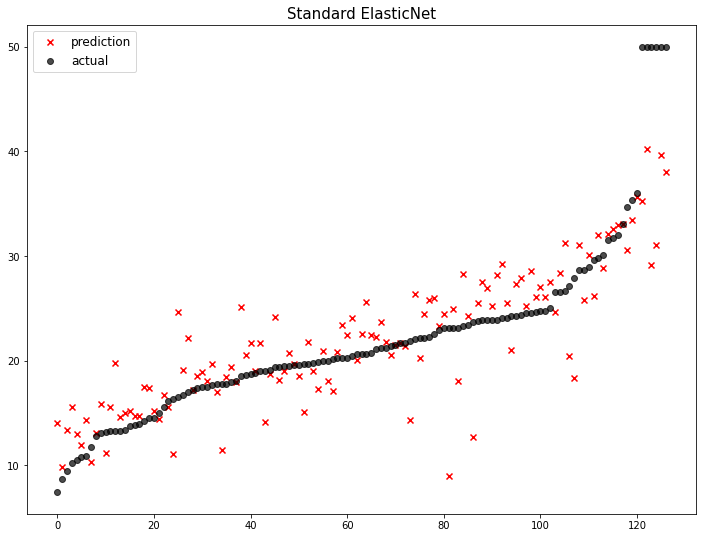

                       model        mse
0           Lasso(alpha=100)  66.698713
1            Lasso(alpha=10)  40.572950
2             Lasso(alpha=1)  25.634577
3   ElasticNet(l1_ratio=0.2)  24.411923
4   ElasticNet(l1_ratio=0.5)  24.215986
5   ElasticNet(l1_ratio=0.8)  23.910466
6           Ridge(alpha=100)  23.535103
7           Lasso(alpha=0.1)  23.045074
8            Ridge(alpha=10)  22.160336
9        Standard ElasticNet  22.046064
10         Lasso(alpha=0.01)  21.427858
11       Ridge(alpha=0.0001)  21.419283
12       Lasso(alpha=0.0001)  21.418929
13        Ridge(alpha=0.001)  21.418607
14        Lasso(alpha=0.001)  21.415542
15         Ridge(alpha=0.01)  21.412031
16            Ridge(alpha=1)  21.409736
17          Ridge(alpha=0.1)  21.362183


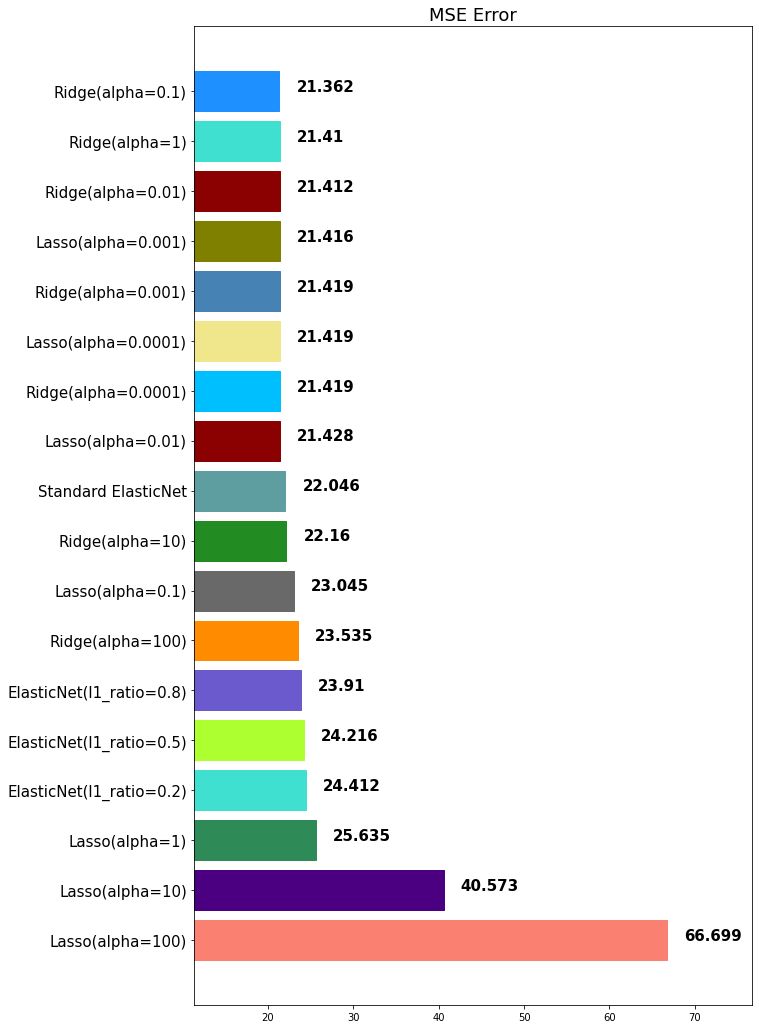

In [123]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

In [124]:
# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

In [125]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [128]:
poly_features = poly.fit_transform(x_train)[0]

In [129]:
poly_features

array([     0.13914   ,      0.        ,      4.05      ,      0.        ,
            0.51      ,      5.572     ,     88.5       ,      2.5961    ,
            5.        ,    296.        ,     16.6       ,    396.9       ,
           14.69      ,      0.01935994,      0.        ,      0.563517  ,
            0.        ,      0.0709614 ,      0.77528808,     12.31389   ,
            0.36122135,      0.6957    ,     41.18544   ,      2.309724  ,
           55.224666  ,      2.0439666 ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,     16.4025    ,      0.        ,
            2.0655    ,     22.5666    ,    358.425     ,     10.514205  ,
           20.25      ,   1198.8       ,     67.23      ,   1607.445     ,
           59.4945    ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [130]:
x_train.iloc[0]

CRIM         0.13914
ZN           0.00000
INDUS        4.05000
CHAS         0.00000
NOX          0.51000
RM           5.57200
AGE         88.50000
DIS          2.59610
RAD          5.00000
TAX        296.00000
PTRATIO     16.60000
B          396.90000
LSTAT       14.69000
Name: 172, dtype: float64

In [131]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [134]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.84101404122066, tolerance: 3.381393778364117
  positive)


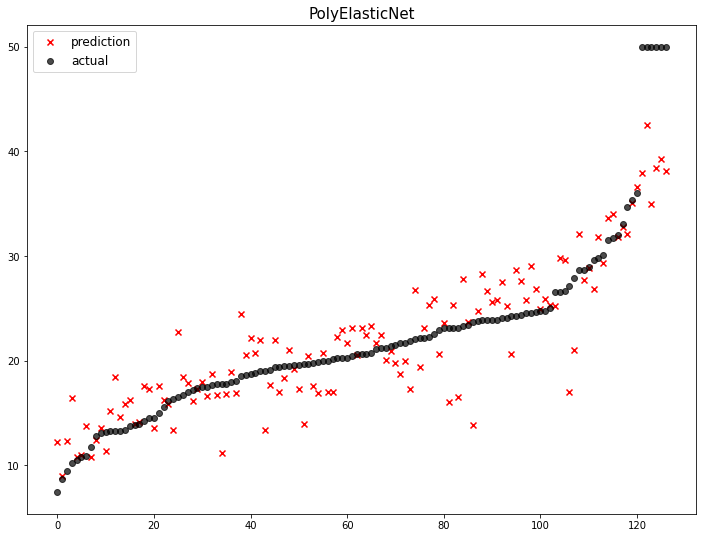

                       model        mse
0           Lasso(alpha=100)  66.698713
1            Lasso(alpha=10)  40.572950
2             Lasso(alpha=1)  25.634577
3   ElasticNet(l1_ratio=0.2)  24.411923
4   ElasticNet(l1_ratio=0.5)  24.215986
5   ElasticNet(l1_ratio=0.8)  23.910466
6           Ridge(alpha=100)  23.535103
7           Lasso(alpha=0.1)  23.045074
8            Ridge(alpha=10)  22.160336
9        Standard ElasticNet  22.046064
10         Lasso(alpha=0.01)  21.427858
11       Ridge(alpha=0.0001)  21.419283
12       Lasso(alpha=0.0001)  21.418929
13        Ridge(alpha=0.001)  21.418607
14        Lasso(alpha=0.001)  21.415542
15         Ridge(alpha=0.01)  21.412031
16            Ridge(alpha=1)  21.409736
17          Ridge(alpha=0.1)  21.362183
18            PolyElasticNet  15.226246


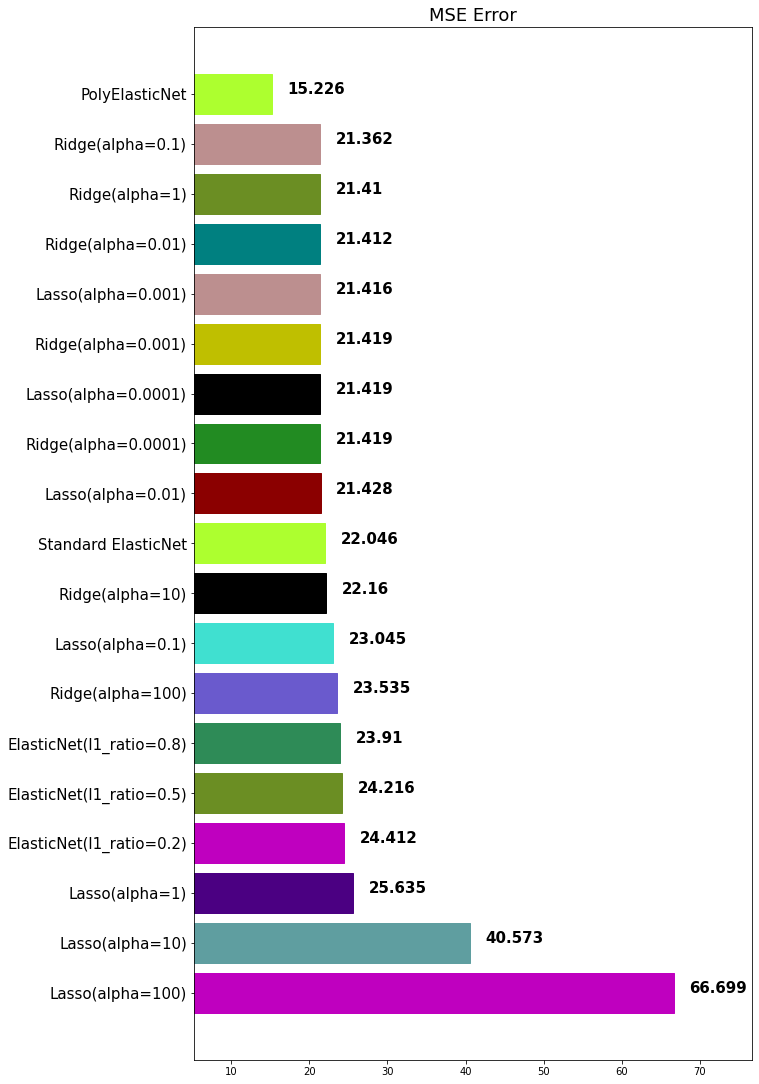

In [135]:
mse_eval('PolyElasticNet', poly_pred, y_test)